# Суммарные функции распределения света по кольцам радиуса 2.5 м 
### для модельных ливней с углами 00-20 град.

In [1]:
!pwd
!date

/home/sphere/Model/Code/02-DrawLDF/DrawSum
Срд Апр  5 17:12:27 MSK 2017


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
import math as mt
import numpy as np

In [3]:
from math import sqrt 

In [4]:
#Прочитать файл 
filename = 'LDF_00-20.csv'
data = pd.read_csv(filename, index_col=0)
data[:3]

,energy,angle,par,num,0,1,2,3,4,5,...,330,331,332,333,334,335,336,337,338,339
0,10,00-20,p,0,47800000.0,302830000.0,425060000.0,417700000.0,415640000.0,576890000.0,...,205109.0,128693.0,90893.0,153502.0,62606.0,96954.0,35205.0,34983.0,17670.0,2233.0
1,10,00-20,p,1,24450000.0,164200000.0,252170000.0,262150000.0,272326000.0,393928000.0,...,451952.0,285387.0,201523.0,339354.0,138387.0,214875.0,77387.0,76346.0,38015.0,4347.0
2,10,00-20,p,2,23290000.0,152700000.0,227150000.0,232489000.0,239184000.0,343355000.0,...,501182.0,315826.0,222997.0,375008.0,153155.0,238107.0,85490.0,84792.0,42366.0,5219.0


In [5]:
print(data.index)
print(data.shape)

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            675, 676, 677, 678, 679, 680, 681, 682, 683, 684],
           dtype='int64', length=685)
(685, 344)


In [6]:
#nums = [str(i) for i in range(340)]
#columns = ['energy','angle','par','num' ] + nums

print(data.columns)
service = ['energy', 'angle', 'par', 'num']
#ldf_param = [x for x in data if (x != 'energy') & (x != 'angle')]
ldf_param = [x for x in data if x not in service]

#print(ldf_param)

Index(['energy', 'angle', 'par', 'num', '0', '1', '2', '3', '4', '5',
       ...
       '330', '331', '332', '333', '334', '335', '336', '337', '338', '339'],
      dtype='object', length=344)


In [7]:
a = [i*2.5 for i in range(340)]

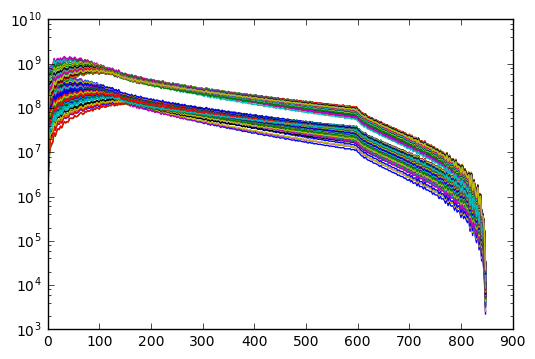

In [8]:
#for part in ['p']:
for i in range(data.shape[0]):
    ldf = data[ldf_param][(data.index == i)].values
    plt.semilogy(a,ldf[0])

(10000000.0, 1000000000.0)

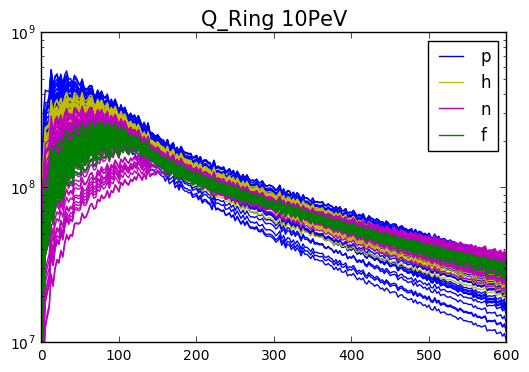

In [9]:
a = [i*2.5 for i in range(340)]

def plot_ldf(par, color):
    ldf = data[ldf_param][(data.par == par) & (data.energy == en)].values
    for i in range(len(ldf)):
        plt.semilogy(a,ldf[i], color)
    plt.semilogy(a,ldf[i], color, label=par)  
    
en = 10
plot_ldf('p', 'b')
plot_ldf('h', 'y')
plot_ldf('n', 'm')
plot_ldf('f', 'g')

plt.title('Q_Ring 10PeV', size = 15)
plt.legend(loc=1)

plt.xlim(0,600)
plt.ylim(1e7, 1e9)

(40000000.0, 2000000000.0)

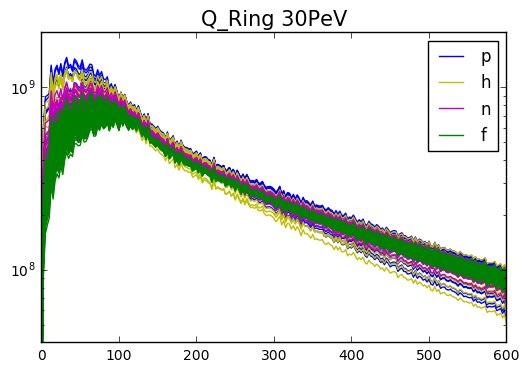

In [10]:
en = 30

plot_ldf('p', 'b')
plot_ldf('h', 'y')
plot_ldf('n', 'm')
plot_ldf('f', 'g')

plt.title('Q_Ring 30PeV', size = 15)
plt.legend(loc=1)

plt.xlim(0,600)
plt.ylim(4e7, 2e9)

In [11]:
def calculateSum(ldf):
    service = ['energy', 'angle', 'par', 'num']
    ldf_param = [x for x in data if x not in service]

    energy   = ldf['energy'].values[0]
    particle = ldf['par'].values[0]
    angle    = ldf['angle'].values[0]
    num      = ldf['num'].values[0]
    a        = ldf[ldf_param].values[0]
    
    step = 2.5 ## 2.5 m in step
    Q = 0
    Q35 = 0
    Q50 = 0
    Q70 = 0
    QR35_70  = 0
    QR50_200 = 0
    QR70_150 = 0
    
    for i in range (len(a)):
        Q   += a[i]
        r = i * step
        
        if(r <= 35):
            Q35 += a[i]
        if(r <= 50):
            Q50 += a[i]
        if(r <= 70):
            Q70 += a[i]

        if((r > 35) & (r < 70)):
            QR35_70  += a[i]
        if((r > 70) & (r < 150)):
            QR70_150 += a[i]
        if((r > 50) & (r < 200)):
            QR50_200 += a[i]           

    #print(  particle, energy, angle, num, Q35, Q50, Q70, Q, QR35_70, QR70_150, QR50_200) 
    return [particle, energy, angle, num, Q35, Q50, Q70, Q, QR35_70, QR70_150, QR50_200]

In [12]:
res = []
for i in range(data.shape[0]):
    res.append(calculateSum(data[data.index == i]))

In [13]:
q  = pd.core.frame.DataFrame(res, columns=['part', 'energy', 'angle', 'n','Q35', 'Q50', 'Q70', 'Q', 'QR35_70', 'QR70_150', 'QR50_200'])
q[:4]

,part,energy,angle,n,Q35,Q50,Q70,Q,QR35_70,QR70_150,QR50_200
0,p,10,00-20,0,6.638755e+09,9.312693e+09,1.229438e+10,2.678915e+10,5.340296e+09,6.557978e+09,1.174127e+10
1,p,10,00-20,1,4.902221e+09,7.433032e+09,1.068834e+10,3.257344e+10,5.417280e+09,8.809426e+09,1.528288e+10
2,p,10,00-20,2,4.255926e+09,6.441772e+09,9.331204e+09,3.090447e+10,4.741578e+09,8.355898e+09,1.436892e+10
3,p,10,00-20,3,5.649946e+09,8.340468e+09,1.164942e+10,3.116417e+10,5.632918e+09,8.210576e+09,1.442909e+10


In [14]:
q.to_csv("Q_00-20.csv")